In [2]:
from netCDF4 import Dataset
import wrf
import cmocean.cm as cmo
import numpy as np

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap

In [3]:
usgs_file = Dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/usgs/wrfinput_d04')
wur_file = Dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur/wrfinput_d04')
wur_lcz_file = Dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur_lcz/wrfinput_d04')
modis_file = Dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/modis_lcz/wrfinput_d04')

In [4]:
import xarray as xr
wur_lcz = xr.open_dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur_lcz/wrfinput_d04')
wur_lcz

<xarray.Dataset> Size: 176MB
Dimensions:               (Time: 1, south_north: 165, west_east: 220,
                           bottom_top: 60, bottom_top_stag: 61,
                           soil_layers_stag: 4, dust_erosion_dimension: 3,
                           west_east_stag: 221, south_north_stag: 166,
                           DIM0010: 5, land_cat_stag: 61, soil_cat_stag: 16,
                           num_ext_model_couple_dom_stag: 1)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 145kB ...
    XLONG                 (Time, south_north, west_east) float32 145kB ...
    XLAT_U                (Time, south_north, west_east_stag) float32 146kB ...
    XLONG_U               (Time, south_north, west_east_stag) float32 146kB ...
    XLAT_V                (Time, south_north_stag, west_east) float32 146kB ...
    XLONG_V               (Time, south_north_stag, west_east) float32 146kB ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                dust_erosion_dimension, west_east_stag,
                                south_north_stag, DIM0010, land_cat_stag,
                                soil_cat_stag, num_ext_model_couple_dom_stag
Data variables: (12/183)
    Times                 (Time) |S19 19B ...
    LU_INDEX              (Time, south_north, west_east) float32 145kB ...
    ZNU                   (Time, bottom_top) float32 240B ...
    ZNW                   (Time, bottom_top_stag) float32 244B ...
    ZS                    (Time, soil_layers_stag) float32 16B ...
    DZS                   (Time, soil_layers_stag) float32 16B ...
    ...                    ...
    C4F                   (Time, bottom_top_stag) float32 244B ...
    PCB                   (Time, south_north, west_east) float32 145kB ...
    PC                    (Time, south_north, west_east) float32 145kB ...
    LANDMASK              (Time, south_north, west_east) float32 145kB ...
    LAKEMASK              (Time, south_north, west_east) float32 145kB ...
    SST                   (Time, south_north, west_east) float32 145kB ...
Attributes: (12/92)
    TITLE:                            OUTPUT FROM REAL_EM V4.6.0 PREPROCESSOR
    START_DATE:                      2019-07-23_06:00:00
    SIMULATION_START_DATE:           2019-07-23_06:00:00
    WEST-EAST_GRID_DIMENSION:        221
    SOUTH-NORTH_GRID_DIMENSION:      166
    BOTTOM-TOP_GRID_DIMENSION:       61
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [5]:
usgs_luindex = wrf.getvar(usgs_file, 'LU_INDEX')
wur_luindex = wrf.getvar(wur_file, 'LU_INDEX')
wur_lcz_luindex = wrf.getvar(wur_lcz_file, 'LU_INDEX')
modis_luindex = wrf.getvar(modis_file, 'LU_INDEX')

lat, lon = wrf.latlon_coords(usgs_luindex)
cart_proj = wrf.get_cartopy(usgs_luindex)

In [6]:
c_modis = [
    [0.43, 0.89, 1.0],
    [0.67, 0.94, 1.0],
    [1.0, 0.77, 0.89],
    [1.0, 0.6, 0.8],
    [1.0, 0.0, 1.0],
    [0.50, 0.0, 0.50],
    [0.0, 0.0, 0.50],
    [0.27, 0.27, 1.0],
    [0.2, 0.4, 1.0],
    [0.52, 0.64, 1.0],
    [1.0, 1.0, 1.0],  # URBAN IN ORIGINAL FILE
    [0.8, 0.8, 0.8],
    [0.70, 0.70, 0.70],
    [0.0, 0.0, 0.0],
    [0.6, 0.6, 0.6],
    [0.35, 0.35, 0.35],
    [0.50, 0.50, 0.0],
    [0.0, 0.36, 0.0],
    [0.0, 0.50, 0.0],
    [0.2, 0.6, 0.4],
    [0.62, 0.84, 0.0],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.83, 1.0, 0.35],
    [1.0, 1.0, 0.0],
    [1.0, 0.72, 0.44],
    [1.0, 0.6, 0.0],
    [1.0, 0.4, 0.0],
    [1.0, 0.0, 0.0],
    [0.64, 0.44, 1.0],
    [0.74, 0.29, 0.0],
    [0.67, 0.0, 0.22],
    [0.52, 0.0, 0.0],
]

c_usgs = np.array([
    [1,0,0],          #  1 Urban and Built-up Land
    [1,1,0],          #! 2 Dryland Cropland and Pasture
    [1,1,.2],         #  3 Irrigated Cropland and Pasture
    [1,1,.3],         #  4 Mixed Dryland/Irrigated Cropland and Pasture
    [.7,.9,.3],       #  5 Cropland/Grassland Mosaic
    [.7,.9,.3],       #  6 Cropland/Woodland Mosaic
    [0,1,0],          #  7 Grassland
    [.3,.7,0],        #  8 Shrubland
    [.82,.41,.12],    #  9 Mixed Shrubland/Grassland
    [1,.84,.0],       #  10 Savanna
    [.2,.8,.4],       #  11 Deciduous Broadleaf Forest
    [.2,.8,.2],       #  12 Deciduous Needleleaf Forest
    [0,.4,.2],        #  13 Evergreen Broadleaf Forest
    [0,.4,0],         #! 14 Evergreen Needleleaf Forest 
    [.2,.6,.2],       #  15 Mixed Forests
    [0,0,.88],        #  16 Water Bodies
    [0,1,1],          #! 17 Herbaceous Wetlands
    [.2,1,1],         #  18 Wooden Wetlands
    [.914,.914,.7],   #  19 Barren or Sparsely Vegetated
    [.86,.08,.23],    #  20 Herbaceous Tundraa
    [.86,.08,.23],    #  21 Wooded Tundra
    [.97,.5,.31],     #! 22 Mixed Tundra
    [.91,.59,.48],   #! 23 Barren Tundra
    [1,1,1]          #! 24 Snow and Ice
    ])



cmap = LinearSegmentedColormap.from_list('luse', c_usgs, N=24)
levels = np.arange(0, 24)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

cmap2 = LinearSegmentedColormap.from_list('luse', c_modis, N=61)
levels2 = np.arange(0, 61)
norm2 = BoundaryNorm(levels2, ncolors=cmap2.N, clip=True)

In [7]:
ax_options = {
    'color': 'black',
    'linestyle': 'dotted',
    'linewidth': 0.5,
    'zorder': 103,
    'draw_labels': True,
    'x_inline': False,
    'y_inline': False,
}
title_options = {
    'loc': 'left',
    'fontsize': 'xx-large',
    'fontweight': 'bold',
}
extent = [np.min(lon), np.max(lon), np.min(lat), np.max(lat)]

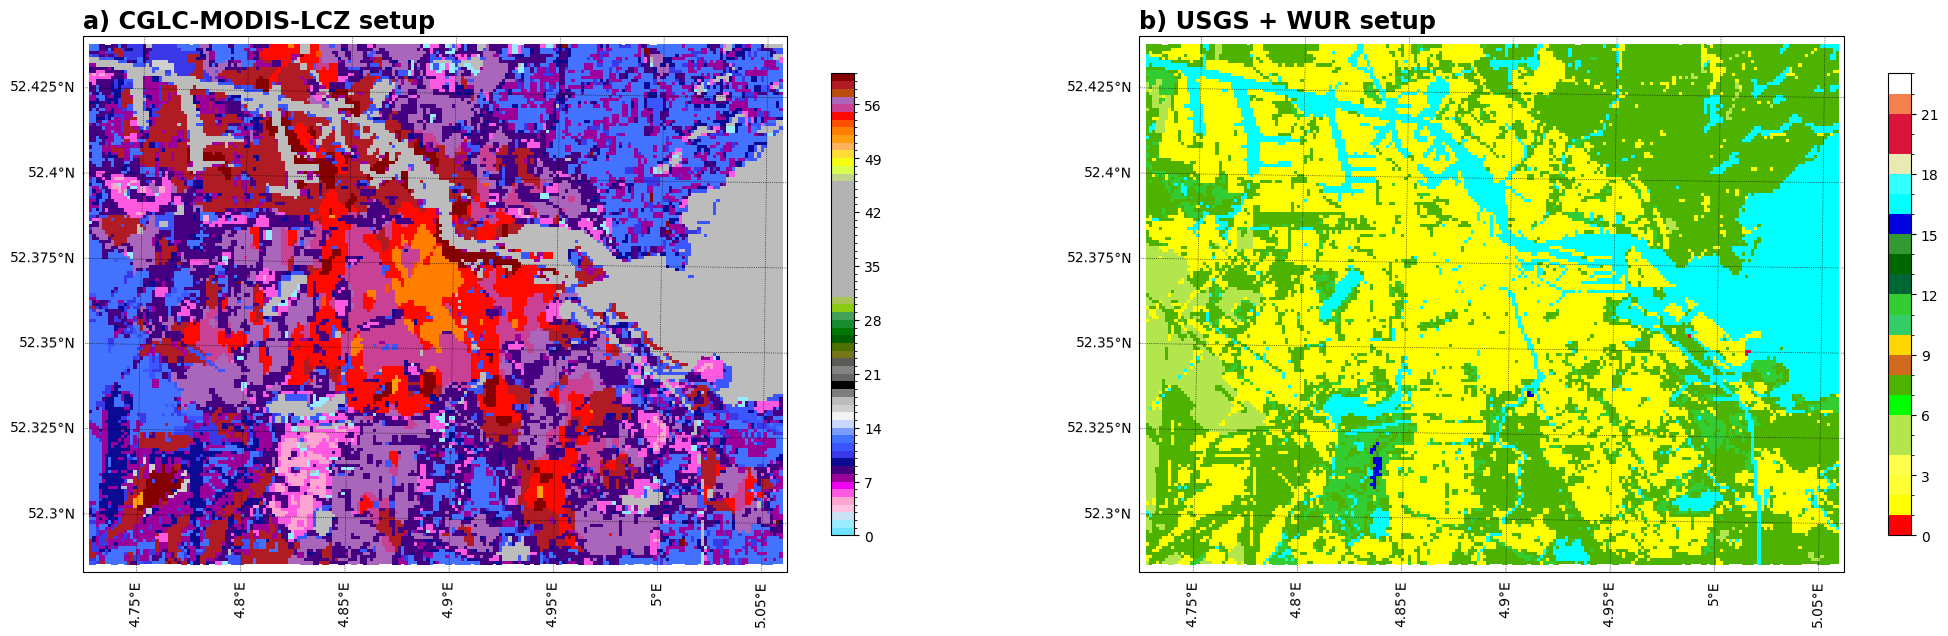

In [8]:
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1, projection=cart_proj)
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)
ct1 = ax1.pcolormesh(
    lon, lat, modis_luindex, cmap=cmap2, norm=norm2, transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax1.set_title('a) CGLC-MODIS-LCZ setup', **title_options)
cbar1 = fig.colorbar(ct1, ax=ax1, shrink=0.6)
#cbar1.ax.set_yticklabels(labels)

ax2 = fig.add_subplot(1, 2, 2, projection=cart_proj)
gl2 = ax2.gridlines(**ax_options)
gl2.right_labels = False
gl2.top_labels = False
ax2.set_extent(extent)
ct2 = ax2.pcolormesh(
    lon, lat, wur_luindex, cmap=cmap, norm=norm, transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax2.set_title('b) USGS + WUR setup', **title_options)
cbar2 = fig.colorbar(ct2, ax=ax2, shrink=0.6)

In [9]:
usgs_T2 = wrf.getvar(usgs_file, 'T2')
wur_T2 = wrf.getvar(wur_file, 'T2')
wur_lcz_T2 = wrf.getvar(wur_lcz_file, 'T2')
modis_T2 = wrf.getvar(modis_file, 'T2')

lat, lon = wrf.latlon_coords(usgs_T2)
cart_proj = wrf.get_cartopy(usgs_T2)

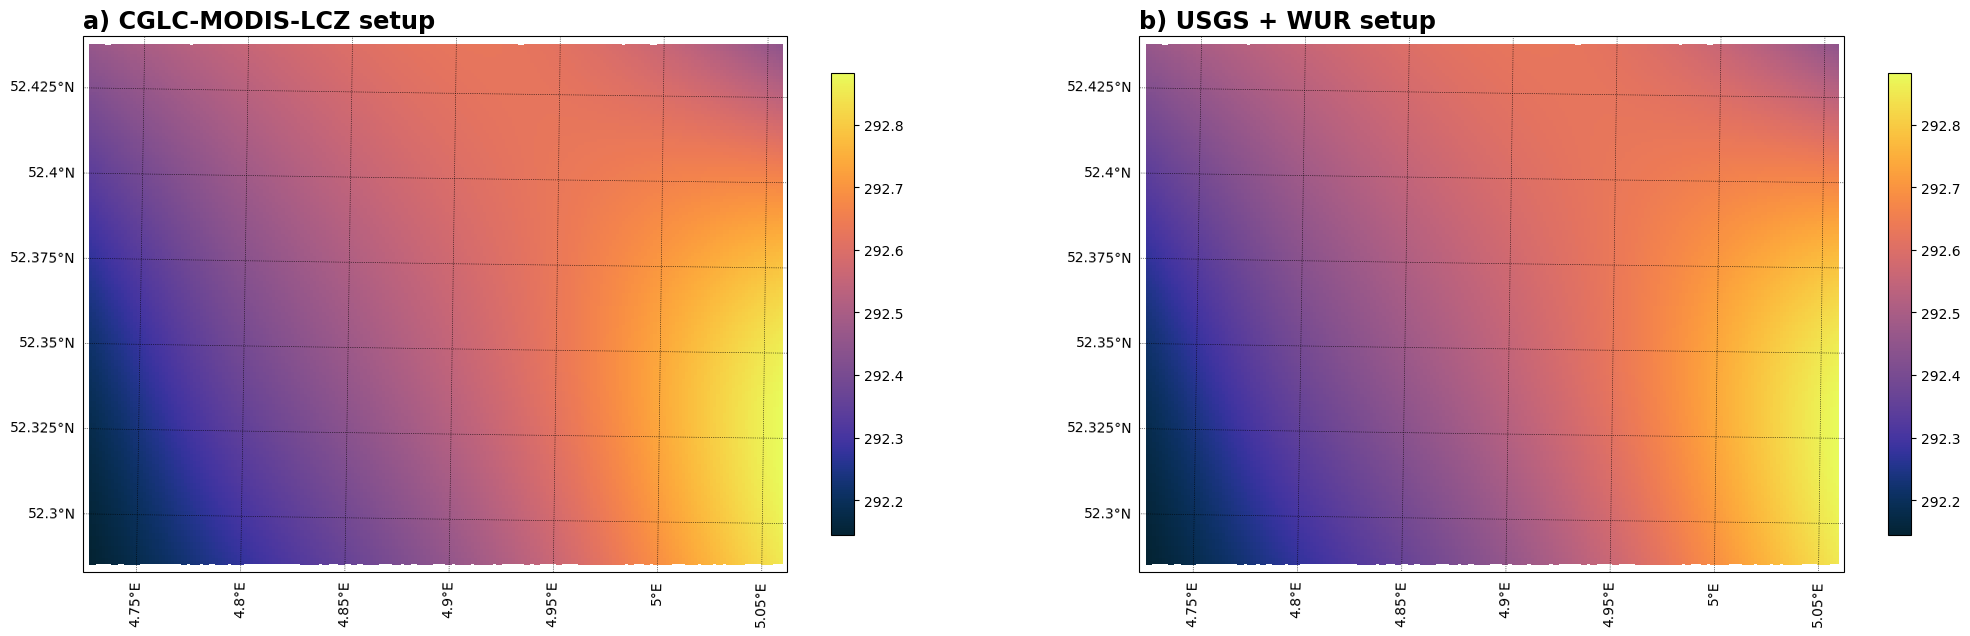

In [10]:
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1, projection=cart_proj)
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)
ct1 = ax1.pcolormesh(
    lon, lat, modis_T2, cmap=cmo.thermal, transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax1.set_title('a) CGLC-MODIS-LCZ setup', **title_options)
cbar1 = fig.colorbar(ct1, ax=ax1, shrink=0.6)

ax2 = fig.add_subplot(1, 2, 2, projection=cart_proj)
gl2 = ax2.gridlines(**ax_options)
gl2.right_labels = False
gl2.top_labels = False
ax2.set_extent(extent)
ct2 = ax2.pcolormesh(
    lon, lat, wur_T2, cmap=cmo.thermal, transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax2.set_title('b) USGS + WUR setup', **title_options)
cbar2 = fig.colorbar(ct2, ax=ax2, shrink=0.6)

In [11]:
usgs_urb2d = wrf.getvar(usgs_file, 'FRC_URB2D')
wur_urb2d = wrf.getvar(wur_file, 'FRC_URB2D')
wur_lcz_urb2d = wrf.getvar(wur_lcz_file, 'FRC_URB2D')
modis_urb2d = wrf.getvar(modis_file, 'FRC_URB2D')

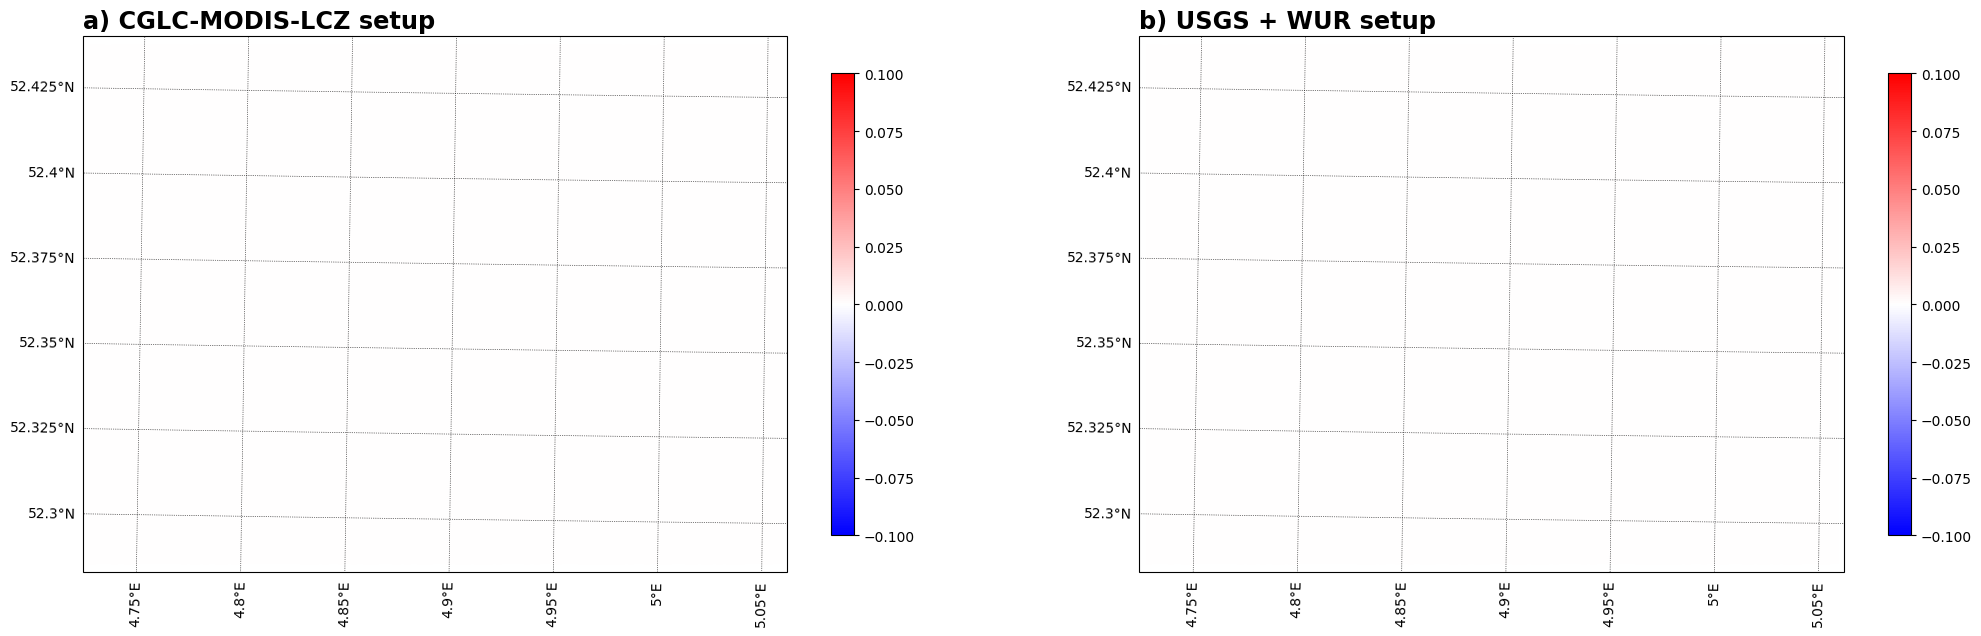

In [12]:
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1, projection=cart_proj)
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)
ct1 = ax1.pcolormesh(
    lon, lat, modis_urb2d, cmap="bwr", transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax1.set_title('a) CGLC-MODIS-LCZ setup', **title_options)
cbar1 = fig.colorbar(ct1, ax=ax1, shrink=0.6)
#cbar1.ax.set_yticklabels(labels)

ax2 = fig.add_subplot(1, 2, 2, projection=cart_proj)
gl2 = ax2.gridlines(**ax_options)
gl2.right_labels = False
gl2.top_labels = False
ax2.set_extent(extent)
ct2 = ax2.pcolormesh(
    lon, lat, wur_urb2d, cmap="bwr", transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax2.set_title('b) USGS + WUR setup', **title_options)
cbar2 = fig.colorbar(ct2, ax=ax2, shrink=0.6)